<a href="https://colab.research.google.com/github/tomreitz/cs766-computer-vision-project/blob/main/code/quantifying_rhytides.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !wget https://tomreitz.github.io/cs766-computer-vision-project/data/pexels-photo-638196.jpeg
# !wget https://upload.wikimedia.org/wikipedia/commons/8/81/Michael_Shapiro_NYTF.jpg
import cv2
import os
import numpy as np
from google.colab.patches import cv2_imshow
#import matplotlib.pyplot as plt

56_1_0_20170113182536919.jpg.chip.jpg


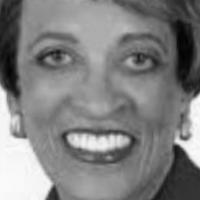

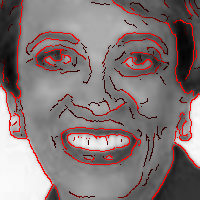

31_0_3_20170119195950692.jpg.chip.jpg


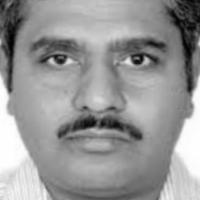

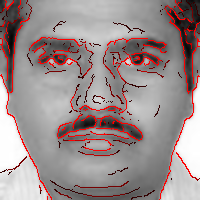

85_1_0_20170110183131183.jpg.chip.jpg


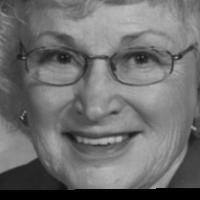

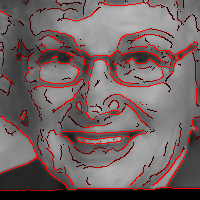

56_1_0_20170113001501874.jpg.chip.jpg


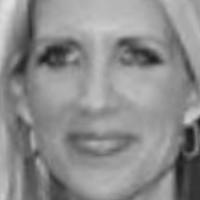

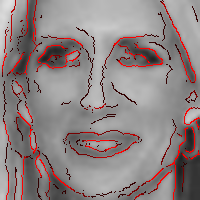

92_0_2_20170105174832245.jpg.chip.jpg


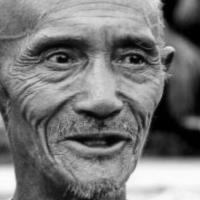

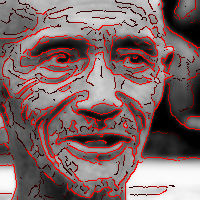

73_1_0_20170120230208857.jpg.chip.jpg


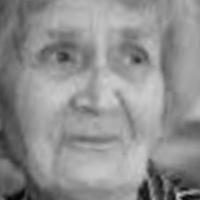

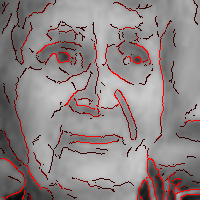

85_1_0_20170110183801752.jpg.chip.jpg


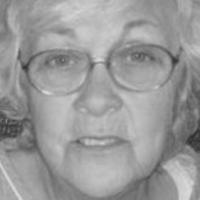

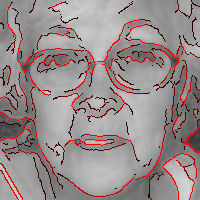

73_1_0_20170120225339921.jpg.chip.jpg


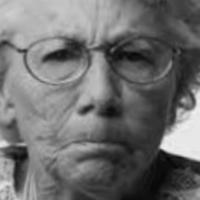

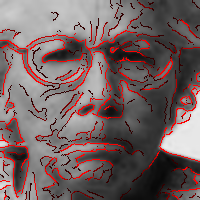

91_0_1_20170117194736477.jpg.chip.jpg


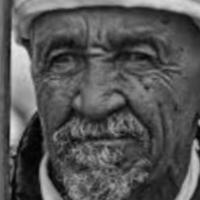

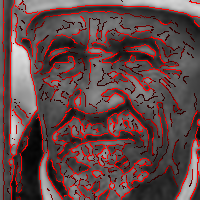

31_0_2_20170104021231011.jpg.chip.jpg


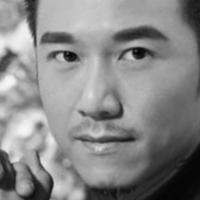

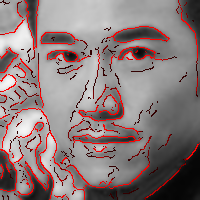

In [21]:
for img_path in os.listdir('./utkface/'):
  if ".jpg" not in img_path: continue
  print(img_path)
  img = cv2.imread('utkface/'+img_path)
  #img = cv2.imread('Michael_Shapiro_NYTF.jpg')
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  scale_percent = 20 # percent of original size
  width = int(img.shape[1] * scale_percent / 100)
  height = int(img.shape[0] * scale_percent / 100)
  #dim = (width, height)
  dim = (200, int(200*img.shape[1]/img.shape[0]))
  # all images should be same size (ish)
  img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
  cv2_imshow(img)
  img = cv2.GaussianBlur(img,(5,5),0)

  steps = 4
  edge_pixels = 0
  img = cv2.merge((img,img,img))  # creat RGB image from grayscale
  img2 = img.copy()
  for i in range(1,steps+1):
    low = 20 + 20*(i-1)
    high = low + 20
    filtered = cv2.bilateralFilter(img, 7, 50, 50)
    edges = cv2.Canny(filtered, low, high)

    img2[edges == 255] = [0, 0, 50+((i-1)*205/(steps-1))]

  cv2_imshow(img2)